In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir('/content/drive/MyDrive/templates'))

['diabetes.csv']


In [13]:
df = pd.read_csv("/content/drive/MyDrive/templates/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


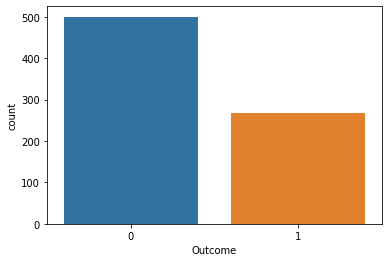

In [14]:
import seaborn as sns
sns.countplot(df.Outcome)

In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN)
df.head() 
#Replaced all 0 values by NaN so it is easy to clean the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [17]:
df.fillna(df.mean(), inplace = True) #Filled Mising values with Mean
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


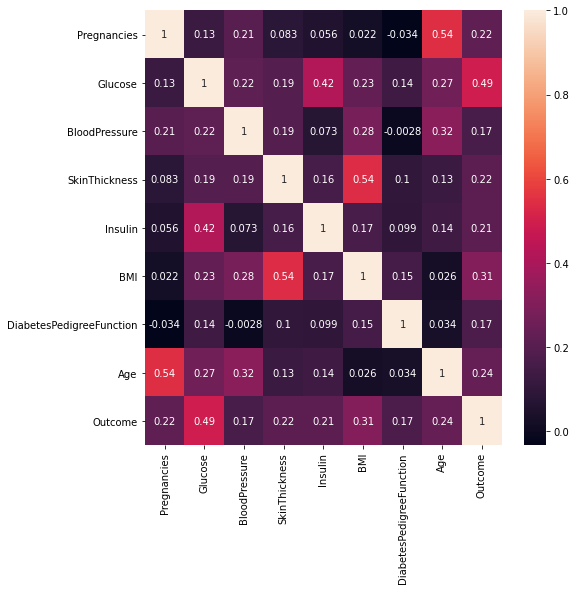

In [19]:
import matplotlib.pyplot as plt
sns.heatmap(df.corr(),annot=True)
fig = plt.gcf()
fig.set_size_inches(8,8)

In [20]:
#feature selection
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
x=df[df.columns[:8]]
y=df.Outcome
clf.fit(x,y)
feature_imp = pd.DataFrame(clf.feature_importances_,index=x.columns)
feature_imp.sort_values(by = 0 , ascending = False)

,0
Glucose,0.257788
BMI,0.163906
Age,0.135327
DiabetesPedigreeFunction,0.126411
Insulin,0.085402
BloodPressure,0.081544
Pregnancies,0.079181
SkinThickness,0.070441


In [32]:
!pip install matplotlib-venn

In [33]:
!apt-get -qq install -y libfluidsynth1

In [34]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Requirement already up-to-date: libarchive in /usr/local/lib/python3.7/dist-packages (0.4.7)


In [35]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [36]:
!pip install cartopy
import cartopy

In [38]:
from sklearn.model_selection import train_test_split

features = df[["Glucose",'BMI','Age','DiabetesPedigreeFunction']]
labels = df.Outcome
features.head()

,Glucose,BMI,Age,DiabetesPedigreeFunction
0,148.0,33.6,50,0.627
1,85.0,26.6,31,0.351
2,183.0,23.3,32,0.672
3,89.0,28.1,21,0.167
4,137.0,43.1,33,2.288


In [39]:
features_train,features_test,labels_train,labels_test = train_test_split(features,labels,stratify=df.Outcome,test_size=0.4)

In [40]:
#DTClassifier
from sklearn.tree import DecisionTreeClassifier 
dtclf = DecisionTreeClassifier()
dtclf.fit(features_train,labels_train)
dtclf.score(features_test,labels_test)

0.7175324675324676

In [41]:
#SVM
from sklearn import svm
clf = svm.SVC(kernel="linear")
clf.fit(features_train,labels_train)
clf.score(features_test,labels_test)

0.7922077922077922

In [42]:
#Naive Bayes Classifier
from sklearn import naive_bayes
nbclf = naive_bayes.GaussianNB()
nbclf.fit(features_train,labels_train)
nbclf.score(features_test,labels_test)

0.8116883116883117

In [43]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knnclf = KNeighborsClassifier(n_neighbors=2)
knnclf.fit(features_train,labels_train)
print(knnclf.score(features_test,labels_test))

0.7175324675324676


In [44]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression()
clf1.fit(features_train,labels_train)
clf1.score(features_test,labels_test)

0.814935064935065

In [45]:
algos = ["Support Vector Machine","Decision Tree","Logistic Regression","K Nearest Neighbor","Naive Bayes"]
clfs = [svm.SVC(kernel="linear"),DecisionTreeClassifier(),LogisticRegression(),KNeighborsClassifier(n_neighbors=2),naive_bayes.GaussianNB()]
result = []

for clff in clfs:
    clff.fit(features_train,labels_train)
    acc = clff.score(features_test,labels_test)
    result.append(acc)
result_df = pd.DataFrame(result,index=algos)
result_df.columns=["Accuracy"]
result_df.sort_values(by="Accuracy",ascending=False)

,Accuracy
Logistic Regression,0.814935
Naive Bayes,0.811688
Support Vector Machine,0.792208
Decision Tree,0.730519
K Nearest Neighbor,0.717532


In [47]:
#Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold =KFold(n_splits=10)

In [48]:
algos = ["Support Vector Machine","Decision Tree","Logistic Regression","K Nearest Neighbor","Naive Bayes"]
clfs = [svm.SVC(kernel="linear"),DecisionTreeClassifier(),LogisticRegression(),KNeighborsClassifier(n_neighbors=2),naive_bayes.GaussianNB()]
cv_results=[]
for classifiers in clfs:
    cv_score = cross_val_score(classifiers,features,labels,cv=kfold,scoring="accuracy")
    cv_results.append(cv_score.mean())
cv_mean = pd.DataFrame(cv_results,index=algos)
cv_mean.columns=["Accuracy"]
cv_mean.sort_values(by="Accuracy",ascending=False)

,Accuracy
Naive Bayes,0.776042
Logistic Regression,0.773394
Support Vector Machine,0.770796
K Nearest Neighbor,0.706955
Decision Tree,0.695232
